### Importação das Bibliotecas

In [1]:
# Bibliotecas
import numpy as np # Biblioteca para operações de álgebra linear
from PIL import Image # Biblioteca para manipular as imgs (fazer a leitura, plotar, etc)
import pandas as pd # Biblioteca para manipulação de dados e álgebra linear
import matplotlib.pyplot as plt # Biblioteca para visualização de dados
from glob import glob # Módulo para encontrar arquivos dado um diretório
#import cv2  

%matplotlib inline

### Criando datasets que contém o diretório de cada imagem

In [2]:
data_dir = './CrackForest-dataset-master/image' # Acessar o diretório com as imagens
image_files = glob(data_dir + '/*.jpg') # Criar um dataset com todos os diretórios das imgs

data_dir_asphalt_crack = './Asphalt Crack Dataset/448/Cracks' # Acessar o diretório com as imagens
asphalt_crack_files = glob(data_dir_asphalt_crack + '/*.jpg') # Criar um dataset com todos os diretórios das imgs

data_dir_asphalt_noncrack = './Asphalt Crack Dataset/448/NonCracks' # Acessar o diretórbio com as imagens
asphalt_noncrack_files = glob(data_dir_asphalt_noncrack + '/*.jpg') # Criar um dataset com todos os diretórios das imgs

In [9]:
image_files

['./CrackForest-dataset-master/image/001.jpg',
 './CrackForest-dataset-master/image/102.jpg',
 './CrackForest-dataset-master/image/067.jpg',
 './CrackForest-dataset-master/image/032.jpg',
 './CrackForest-dataset-master/image/317.jpg',
 './CrackForest-dataset-master/image/103.jpg',
 './CrackForest-dataset-master/image/051.jpg',
 './CrackForest-dataset-master/image/320.jpg',
 './CrackForest-dataset-master/image/114.jpg',
 './CrackForest-dataset-master/image/206.jpg',
 './CrackForest-dataset-master/image/005.jpg',
 './CrackForest-dataset-master/image/115.jpg',
 './CrackForest-dataset-master/image/044.jpg',
 './CrackForest-dataset-master/image/018.jpg',
 './CrackForest-dataset-master/image/008.jpg',
 './CrackForest-dataset-master/image/046.jpg',
 './CrackForest-dataset-master/image/081.jpg',
 './CrackForest-dataset-master/image/324.jpg',
 './CrackForest-dataset-master/image/304.jpg',
 './CrackForest-dataset-master/image/301.jpg',
 './CrackForest-dataset-master/image/076.jpg',
 './CrackFore

### Criando funções para que, dado um dataset que tenha o diretório das imagens, duplique ou triplique o meu número de dados

In [3]:
# A função abaixo vai criar 2 datasets contendo os pixels de cada imagem contida no dataset dos Diretórios   
# O primeiro dataset contém as imgs originais, o segundo contém as imgs rotacionadas em 180°
# E no final vai nos retornar um dataset que junta os dois anteriores, dessa forma consigo
# duplicar meu número de dados

def df_create_2(df_name, df_name_rotate, image_data): # (dataframe1 vazio, dataframe1 rotacionado vazio, dataset do diretório)    
    for file in range(0, len(image_data),1): # com esse for vamos varrer cada linha do meu dataset com os dir
        img1 = Image.open(image_data[file],'r') # Estamos lendo as imgs do dataset que contém os dirs
        img1 = img1.convert('L') # Transformando a img para greyscale
        img1 = img1.resize((448, 448)) 
        img1_rotate = img1.rotate(180) # Rotacionando a img em 180°
        
        img1_n = np.asarray(img1.getdata(), dtype=np.float64) # Convertendo a img para pixels e salvando em um Numpy Array de 1 dimensão   
        img1_n_rotate = np.asarray(img1_rotate.getdata(), dtype=np.float64) # Fazendo a mesma coisa para a imagem rotacionada
        
        df_name[file] = img1_n # Adicionando os pixels de uma img no dataframe1 vazio
        df_name_rotate[file] = img1_n_rotate # Mesma coisa para as imgs rotacionadas
        
    df_name = df_name.T # Pegando a transposta da Matrix para que as linhas sejam as imagens e as colunas seus pixels
    df_name_rotate = df_name_rotate.T # Pegando a transposta da Matrix para que as linhas sejam as imagens e as colunas seus pixel
    df_concat = pd.concat([df_name,df_name_rotate], ignore_index=True) # Juntando as duas matrizes 
    return df_concat # Retornando o DataFrame(Matriz) Desejada

In [4]:
# A função abaixo faz a mesma coisa que a df_create_2, porém ela triplica o meu número de imagem
# Ou seja, ela criar três dataframes(matrizes), o primeiro sendo as imgs originais
# O segundo as imgs rotacionadas em 90° e o terceiro as imgs rotacionadas em 180°
def df_create_3(df_name, df_name_rotate90,df_name_rotate180, image_data):
    #df_name = pd.DataFrame()
    for file in range(0, len(image_data),1):
        img1 = Image.open(image_data[file],'r')
        img1 = img1.convert('L') # Makes it greyscale
        img1 = img1.resize((448, 448))
        img1_rotate90 = img1.rotate(90)
        img1_rotate180 = img1.rotate(180)
        
        img1_n = np.asarray(img1.getdata(), dtype=np.float64)
        img1_n_rotate90 = np.asarray(img1_rotate90.getdata(), dtype=np.float64)
        img1_n_rotate180 = np.asarray(img1_rotate180.getdata(), dtype=np.float64)

        df_name[file] = img1_n
        df_name_rotate90[file] = img1_n_rotate90
        df_name_rotate180[file] = img1_n_rotate180
        
    df_name = df_name.T
    df_name_rotate90 = df_name_rotate90.T
    df_name_rotate180 = df_name_rotate180.T
    df_concat = pd.concat([pd.concat([df_name,df_name_rotate90], ignore_index=True),df_name_rotate180], ignore_index=True)   
    #df_concat = df_concat.reset_index().drop('index', axis=1)
    return df_concat

### Criando os datasets onde cada linha representa uma imagem e cada coluna representa os pixels dessa imagem

In [5]:
# DataFrame 1 com imagens de rachaduras, utilizando a função df_create_2
df_crack1 = pd.DataFrame()
df_crack1_rotate = pd.DataFrame()
df_crack1 = df_create_2(df_crack1, df_crack1_rotate, image_files)

# Dataframe 2 com imagens de rachadura, utilizando a função df_create_2
df_crack2 = pd.DataFrame()
df_crack2_rotate = pd.DataFrame()
df_crack2 = df_create_2(df_crack2, df_crack2_rotate, asphalt_crack_files)

# Dataframe 3 combinando os Dataframes 1 e 2, totalizando 710 imagens de rachaduras
df_crack = pd.concat([df_crack1, df_crack2], ignore_index=True)

# Dataframe com imagens sem rachaduras
# Aqui eu chamo a função df_create_3 e triplico o número de dados que tenho de imgs sem rachaduras 
df_non_crack = pd.DataFrame()
df_non_crack_rotate90 = pd.DataFrame()
df_non_crack_rotate180 = pd.DataFrame()
df_non_crack = df_create_3(df_non_crack, df_non_crack_rotate90, df_non_crack_rotate180, asphalt_noncrack_files)

### Visualização dos DataFrames

* Dataframe com as imagens de rachaduras
* Total de 710 imagens

In [11]:
# Criando a coluna label (target value)
#df_crack.to_csv('df_crack.csv', index=False)
df_crack['label'] = 1
df_crack


,0,1,2,3,4,5,6,7,8,9,...,200695,200696,200697,200698,200699,200700,200701,200702,200703,label
0,124.0,109.0,99.0,101.0,107.0,112.0,118.0,127.0,118.0,110.0,...,127.0,125.0,128.0,127.0,121.0,126.0,135.0,130.0,116.0,1
1,158.0,155.0,137.0,149.0,169.0,148.0,137.0,139.0,147.0,152.0,...,155.0,149.0,145.0,146.0,149.0,140.0,148.0,154.0,133.0,1
2,121.0,117.0,111.0,110.0,120.0,128.0,124.0,130.0,127.0,116.0,...,121.0,130.0,114.0,78.0,80.0,100.0,108.0,111.0,120.0,1
3,134.0,120.0,113.0,121.0,130.0,127.0,124.0,125.0,126.0,123.0,...,105.0,108.0,116.0,115.0,113.0,108.0,102.0,97.0,96.0,1
4,253.0,254.0,254.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,...,93.0,103.0,107.0,107.0,106.0,93.0,94.0,106.0,110.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,200.0,213.0,197.0,197.0,203.0,194.0,184.0,168.0,155.0,172.0,...,152.0,174.0,202.0,194.0,178.0,183.0,157.0,140.0,184.0,1
706,171.0,124.0,122.0,138.0,122.0,130.0,129.0,124.0,150.0,193.0,...,161.0,154.0,200.0,171.0,150.0,157.0,187.0,148.0,134.0,1
707,140.0,140.0,141.0,144.0,150.0,136.0,153.0,134.0,129.0,126.0,...,96.0,103.0,136.0,143.0,148.0,132.0,154.0,168.0,165.0,1
708,181.0,178.0,183.0,197.0,199.0,194.0,174.0,184.0,187.0,182.0,...,189.0,193.0,201.0,206.0,207.0,203.0,194.0,160.0,157.0,1


* Dataframe com as imagens sem rachaduras
* Total de 600 imagens

In [12]:
df_non_crack['label'] = 0
#df_non_crack.to_csv('df_non_crack.csv', index=False)
df_non_crack


,0,1,2,3,4,5,6,7,8,9,...,200695,200696,200697,200698,200699,200700,200701,200702,200703,label
0,155.0,244.0,208.0,144.0,145.0,145.0,159.0,193.0,153.0,186.0,...,64.0,116.0,108.0,115.0,122.0,129.0,133.0,99.0,52.0,0
1,184.0,170.0,169.0,146.0,147.0,158.0,150.0,183.0,191.0,166.0,...,167.0,200.0,196.0,170.0,148.0,201.0,180.0,185.0,177.0,0
2,107.0,117.0,149.0,79.0,106.0,146.0,164.0,69.0,54.0,123.0,...,174.0,182.0,136.0,109.0,109.0,75.0,158.0,196.0,152.0,0
3,192.0,78.0,63.0,197.0,225.0,227.0,203.0,132.0,78.0,124.0,...,122.0,118.0,98.0,85.0,102.0,173.0,183.0,184.0,189.0,0
4,71.0,101.0,87.0,112.0,131.0,148.0,150.0,146.0,134.0,153.0,...,176.0,157.0,171.0,160.0,157.0,112.0,135.0,165.0,124.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,198.0,180.0,184.0,207.0,222.0,200.0,159.0,183.0,181.0,199.0,...,167.0,157.0,167.0,171.0,163.0,173.0,177.0,180.0,179.0,0
596,153.0,152.0,143.0,137.0,137.0,135.0,132.0,135.0,130.0,127.0,...,155.0,144.0,136.0,134.0,133.0,131.0,136.0,137.0,128.0,0
597,180.0,120.0,127.0,94.0,107.0,74.0,70.0,86.0,87.0,75.0,...,184.0,170.0,180.0,190.0,127.0,162.0,213.0,178.0,118.0,0
598,148.0,160.0,132.0,145.0,247.0,216.0,206.0,238.0,149.0,100.0,...,176.0,179.0,198.0,202.0,180.0,124.0,155.0,152.0,136.0,0


In [13]:
df_final = pd.concat([df_crack, df_non_crack], ignore_index=True)
df_final

,0,1,2,3,4,5,6,7,8,9,...,200695,200696,200697,200698,200699,200700,200701,200702,200703,label
0,124.0,109.0,99.0,101.0,107.0,112.0,118.0,127.0,118.0,110.0,...,127.0,125.0,128.0,127.0,121.0,126.0,135.0,130.0,116.0,1
1,158.0,155.0,137.0,149.0,169.0,148.0,137.0,139.0,147.0,152.0,...,155.0,149.0,145.0,146.0,149.0,140.0,148.0,154.0,133.0,1
2,121.0,117.0,111.0,110.0,120.0,128.0,124.0,130.0,127.0,116.0,...,121.0,130.0,114.0,78.0,80.0,100.0,108.0,111.0,120.0,1
3,134.0,120.0,113.0,121.0,130.0,127.0,124.0,125.0,126.0,123.0,...,105.0,108.0,116.0,115.0,113.0,108.0,102.0,97.0,96.0,1
4,253.0,254.0,254.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,...,93.0,103.0,107.0,107.0,106.0,93.0,94.0,106.0,110.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,198.0,180.0,184.0,207.0,222.0,200.0,159.0,183.0,181.0,199.0,...,167.0,157.0,167.0,171.0,163.0,173.0,177.0,180.0,179.0,0
1306,153.0,152.0,143.0,137.0,137.0,135.0,132.0,135.0,130.0,127.0,...,155.0,144.0,136.0,134.0,133.0,131.0,136.0,137.0,128.0,0
1307,180.0,120.0,127.0,94.0,107.0,74.0,70.0,86.0,87.0,75.0,...,184.0,170.0,180.0,190.0,127.0,162.0,213.0,178.0,118.0,0
1308,148.0,160.0,132.0,145.0,247.0,216.0,206.0,238.0,149.0,100.0,...,176.0,179.0,198.0,202.0,180.0,124.0,155.0,152.0,136.0,0


### Visualizando as imagens

* Rachaduras

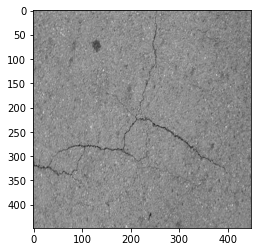

In [14]:
# Img original
#df.loc[:, df.columns != 'b']
d = df_final.loc[1, df_final.columns != 'label'].values.reshape(448,448)
plt.imshow(d, cmap='gray')

plt.show()

In [18]:
pd.DataFrame(df_final.loc[1, df_final.columns != 'label'].values.reshape(448,448))

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,158.0,155.0,137.0,149.0,169.0,148.0,137.0,139.0,147.0,152.0,...,136.0,158.0,169.0,146.0,147.0,153.0,147.0,143.0,130.0,151.0
1,159.0,148.0,139.0,148.0,156.0,144.0,137.0,140.0,154.0,159.0,...,136.0,149.0,162.0,150.0,150.0,157.0,154.0,151.0,136.0,151.0
2,160.0,141.0,144.0,151.0,145.0,143.0,139.0,141.0,159.0,164.0,...,137.0,141.0,152.0,151.0,151.0,158.0,158.0,158.0,142.0,146.0
3,158.0,137.0,152.0,161.0,145.0,148.0,144.0,142.0,158.0,162.0,...,138.0,138.0,142.0,144.0,147.0,151.0,153.0,157.0,144.0,139.0
4,139.0,127.0,147.0,161.0,147.0,145.0,136.0,139.0,154.0,157.0,...,136.0,139.0,138.0,139.0,145.0,144.0,146.0,153.0,148.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,148.0,158.0,157.0,146.0,147.0,156.0,159.0,145.0,146.0,152.0,...,157.0,156.0,140.0,138.0,144.0,146.0,152.0,143.0,137.0,154.0
444,149.0,160.0,159.0,148.0,147.0,153.0,150.0,144.0,156.0,162.0,...,154.0,152.0,144.0,145.0,151.0,151.0,149.0,140.0,138.0,147.0
445,147.0,162.0,162.0,149.0,146.0,151.0,147.0,147.0,160.0,164.0,...,153.0,151.0,148.0,151.0,153.0,152.0,144.0,138.0,137.0,134.0
446,144.0,162.0,165.0,151.0,145.0,151.0,149.0,150.0,159.0,160.0,...,154.0,153.0,149.0,149.0,150.0,151.0,141.0,142.0,145.0,130.0


<IPython.core.display.Javascript object>


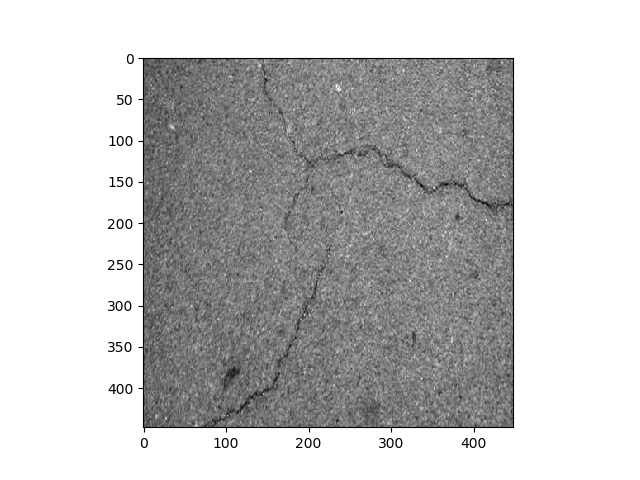

In [11]:
# Img rotacionada em 180°

d = df_crack.iloc[156].values.reshape(448,448)
plt.imshow(d, cmap='gray')

plt.show()

* Imagem sem rachadura

<IPython.core.display.Javascript object>


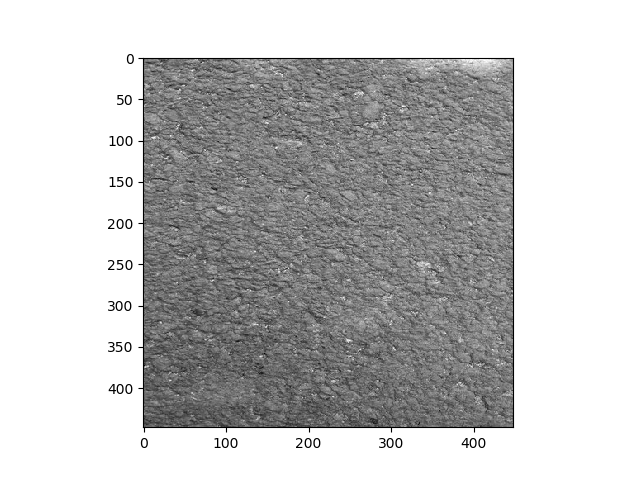

In [15]:
# Img original
d = df_non_crack.iloc[1].values.reshape(448,448)
plt.imshow(d, cmap='gray')

plt.show()

<IPython.core.display.Javascript object>


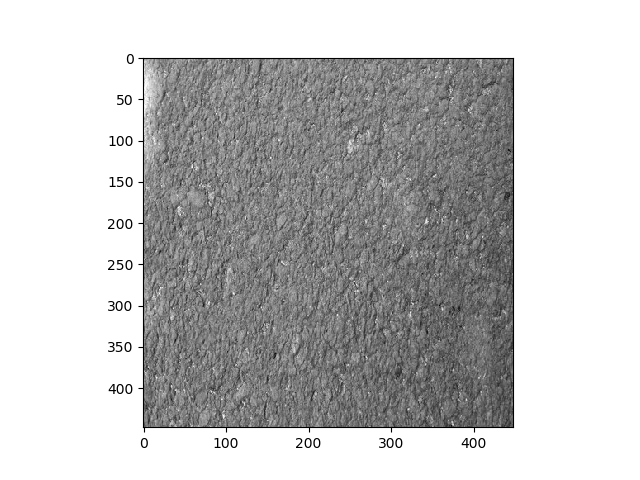

In [16]:
# Img rotacionada em 90°
d = df_non_crack.iloc[201].values.reshape(448,448)
plt.imshow(d, cmap='gray')

plt.show()

<IPython.core.display.Javascript object>


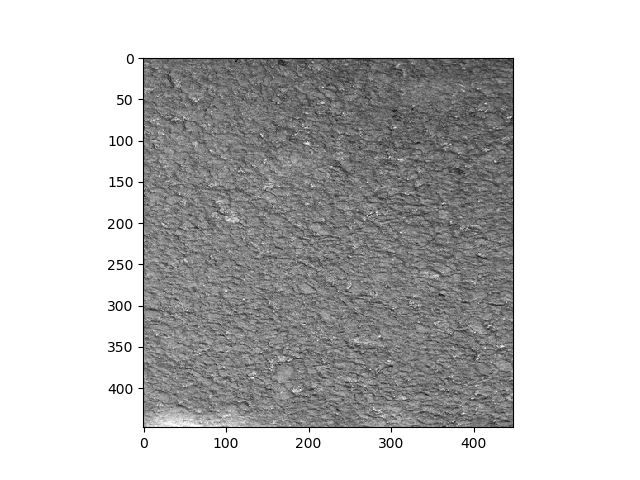

In [17]:
# Img rotacionada em 180°
d = df_non_crack.iloc[401].values.reshape(448,448)
plt.imshow(d, cmap='gray')

plt.show()

In [7]:
pd.read_csv('./Oil Spill/OilSpill_Dataset.csv', header=None)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0
